In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

x_1, _, _, y = np.loadtxt("ornek_logistic.txt", unpack=True)

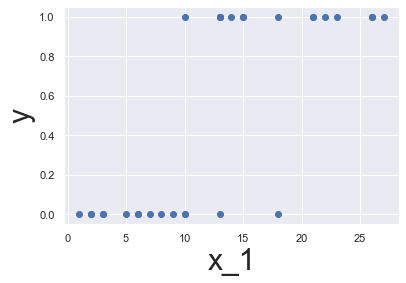

In [2]:
plt.plot(x_1, y, "bo")
plt.xlabel("x_1", fontsize=30)
plt.ylabel("y", fontsize=30)
plt.show()

$\hat{y} = x_1*w_1 + x_2 * w_2 + ...$

$\hat{y} = magicFunction(x_1*w_1 + x_2 * w_2 + ...)$

$\sigma(z) = \frac{1}{1 + e^{-z}}$


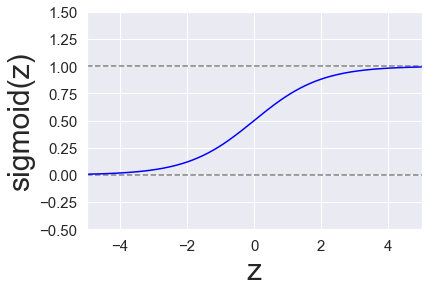

In [4]:
sigmoid = lambda z : 1 / (1 + np.exp(-z))

l_offset = -5 
r_offset = 5

plt.axis([l_offset, r_offset, -0.5, 1.5])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.plot([l_offset, r_offset], [1, 1], color="grey", linestyle="dashed")
plt.plot([l_offset, r_offset], [0, 0], color="grey", linestyle="dashed")

X = np.linspace(l_offset, r_offset, 200)
Y = [sigmoid(x) for x in X]
plt.xlabel("z", fontsize=30)
plt.ylabel("sigmoid(z)", fontsize=30)
plt.plot(X, Y, color="blue")

plt.show()

In [5]:
def magic_sigmoid(z):
    return 1/(1 + np.exp(-z))

def forward_pass(feature_matrix_X, weights_w):
    return magic_sigmoid(np.matmul(feature_matrix_X, weights_w))

def classify_or_prediction(X, w):
    return np.round(forward_pass(X,w))



# Yeni maliyet fonksiyonumuz, log loss

$L = - \frac{1}{m} \sum\limits_{i=1}^m [y_i \cdot log_e(\hat{y_i}) + (1-y_i) \cdot log_e(1-\hat{y_i}) ]$

In [6]:
def compute_loss(X, Y, w):
    y_hat = forward_pass(X, w)
    return -np.average(Y * np.log(y_hat) + (1-Y)*np.log(1-y_hat))

def compute_gradient(X, Y, w):
    return np.matmul(X.T, (forward_pass(X, w) - Y)) / X.shape[0]

def fit(X, Y, max_iter, learning_rate):
    weights = np.zeros((X.shape[1], 1))
    for i in range(max_iter):
        #print("Iterasyon : {} Kayip: {:.5f}".format(i, compute_loss(X, Y, weights)))
        weights -= compute_gradient(X, Y, weights) * learning_rate
    return weights

In [7]:
def test(X,Y,w):
    total_number_of_ex = X.shape[0]
    correct_predictions = np.sum(classify_or_prediction(X, w) == Y)
    success_percent = correct_predictions * 100 / total_number_of_ex
    print("\n\nSuccess: {}/{} ({:2f}%)".format(correct_predictions, total_number_of_ex, success_percent))
    


In [9]:
x_1, x_2, x_3, y = np.loadtxt("ornek_logistic.txt", unpack=True)

X = np.column_stack((np.ones(x_1.size), x_1, x_2, x_3))
Y = y.reshape(-1,1)

weights = fit(X, Y, 100000, 0.001)

In [10]:
test(X, Y, weights)



Success: 29/30 (96.666667%)


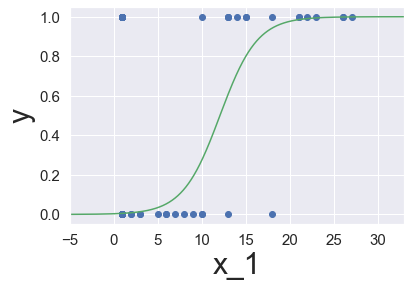

In [11]:
# 2 boyutlu sınıflandırmayı çizdirelim
X = np.column_stack((np.ones(x_1.size), x_1))
Y = y.reshape(-1, 1)
w = fit(X, Y, 1000000, 0.01)
plt.plot(X, Y, "bo")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("x_1", fontsize=30)
plt.ylabel("y", fontsize=30)

offset = 3

l_edge = X[:, 1].min() - offset
r_edge = X[:, 1].max() + offset

inputs = np.linspace(l_edge - offset, r_edge + offset, 2500)
x_vals = np.column_stack((np.ones(inputs.size), inputs.reshape(-1,1)))
y_vals = forward_pass(x_vals, w)

plt.axis([l_edge - offset, r_edge + offset, -0.05, 1.05])
plt.plot(x_vals[:,1], y_vals, color="g")
plt.show()

<IPython.core.display.Javascript object>


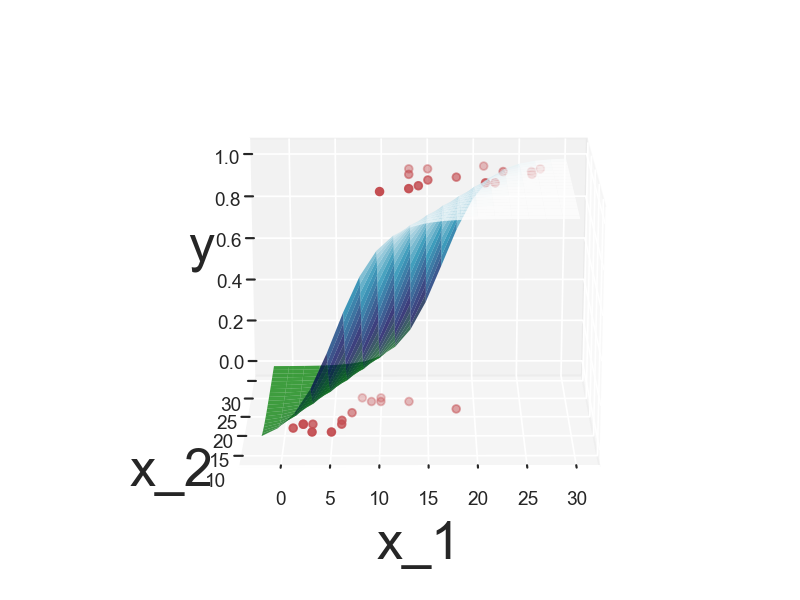

In [12]:
%matplotlib notebook
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
x_1, x_2, _, y = np.loadtxt("ornek_logistic.txt",  unpack=True)
X = np.column_stack((np.ones(x_1.size), x_1, x_2))
Y = y.reshape(-1, 1)
w = fit(X, Y, 10000, 0.001)

sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})
ax = plt.figure().gca(projection="3d")
ax.set_xlabel("x_1", labelpad=15, fontsize=30)
ax.set_ylabel("x_2", labelpad=15, fontsize=30)
ax.set_zlabel("y", labelpad=5, fontsize=30)


ax.scatter(x_1, x_2, y, color='r')

offset = 3 
size_of_mesh = 20

x, y = np.meshgrid(np.linspace(x_1.min() - offset, x_1.max() + offset, size_of_mesh),
                  np.linspace(x_2.min() - offset, x_2.max() + offset, size_of_mesh))

z = np.array([forward_pass(np.column_stack(([1], [i], [j])), w) for i, j in zip(np.ravel(x), np.ravel(y))])
z = z.reshape((size_of_mesh, size_of_mesh))
ax.plot_surface(x, y, z, alpha=0.75, cmap=cm.ocean,
                linewidth=0, antialiased=True, color='black')

plt.show()